In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

safediv(x, y) = x==0 ? zero(x/y) : x/y

function pvalue_score(k, n, p)
    χ² = safediv((k - n*p)^2, n*p*(1-p))
    ccdf(Chisq(1), χ²)
end

function confint_score(k, n, α=0.05)
    α == 0 && return [0.0, 1.0]
    p̂ = k/n
    z = quantile(Normal(), 1-α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

confint_score (generic function with 2 methods)

データの数値「n = 20 回中 k = 5 回成功」という数値が得られた。成功確率 p を扱いたい。

In [2]:
k, n = 5, 20

(5, 20)

①固定された有意水準 α = 0.05 で帰無仮説 p = 0.5 が棄却されたか否かのみを報告

In [3]:
α = 0.05
p = 0.5
@show pvalue_score(k, n, p) < α;

pvalue_score(k, n, p) < α = true


②帰無仮説 p = 0.5 のP値を報告

In [4]:
p = 0.5
@show pvalue_score(k, n, p);

pvalue_score(k, n, p) = 0.025347318677468256


③すべての検定仮説 p = a のP値を報告

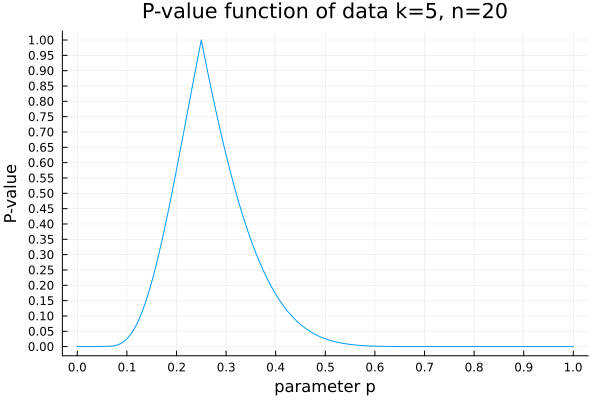

In [5]:
plot(p -> pvalue_score(k, n, p), 0, 1; label="")
plot!(xguide="parameter p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value function of data k=$k, n=$n")

❷固定された信頼水準 1-α=95% の信頼区間を報告

In [6]:
α = 0.05
@show confint_score(k, n, α);

confint_score(k, n, α) = [0.1118617014076655, 0.46870087761874435]


❸すべての信頼水準の信頼区間全体を報告

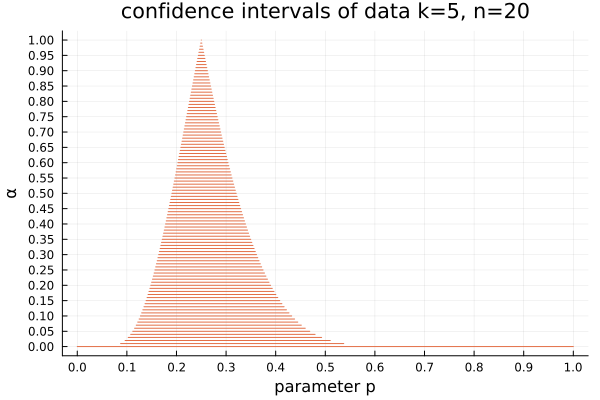

In [7]:
plot()
αs = 0.00:0.01:1
for α in αs
    plot!(confint_score(k, n, α), fill(α, 2); label="", c=2)
end
plot!(xguide="parameter p", yguide="α")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("confidence intervals of data k=$k, n=$n")

③と❸が同等であること

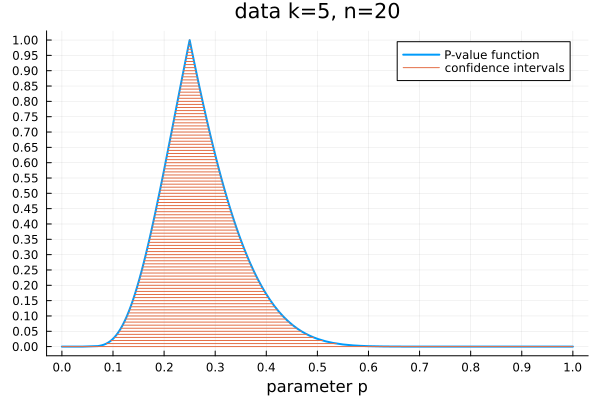

In [8]:
plot(p -> pvalue_score(k, n, p), 0, 1; label="P-value function", lw=2)
αs = 0.00:0.01:1
l = true
for α in αs
    plot!(confint_score(k, n, α), fill(α, 2); 
        label=(l ? "confidence intervals" : ""), c=2)
    l = false
end
plot!(xguide="parameter p", yguide="")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("data k=$k, n=$n")